In [75]:
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization

  #ML algorithm to be used
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb

#Model evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix


%matplotlib inline

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [76]:
df=pd.read_csv("TaxiFare.csv")

In [77]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [78]:
df.shape

(50000, 8)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [80]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [81]:
# Data Preprocessing


#checking missing values in the data
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [82]:
#Droping the unique_id column
df.drop(labels='unique_id',axis=1,inplace=True)

In [83]:
df.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [84]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
df['date_time_of_pickup'] =  pd.to_datetime(df['date_time_of_pickup'], format='%Y-%m-%d %H:%M:%S UTC')

In [85]:
### Seperating the Pickup_datetime column into separate field like year, month, day of the week, etc
df['year'] = df['date_time_of_pickup'].dt.year
df['Month'] = df['date_time_of_pickup'].dt.month
df['Date'] = df['date_time_of_pickup'].dt.day
df['Day'] = df['date_time_of_pickup'].dt.dayofweek
df['Hour'] = df['date_time_of_pickup'].dt.hour
df['Minute'] = df['date_time_of_pickup'].dt.minute

In [86]:
df.dtypes

amount                         float64
date_time_of_pickup     datetime64[ns]
longitude_of_pickup            float64
latitude_of_pickup             float64
longitude_of_dropoff           float64
latitude_of_dropoff            float64
no_of_passenger                  int64
year                             int64
Month                            int64
Date                             int64
Day                              int64
Hour                             int64
Minute                           int64
dtype: object

In [87]:
#Checking the passenger count variable
df["no_of_passenger"].describe()

count    50000.000000
mean         1.667840
std          1.289195
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [88]:
# removing the values with passenger count of 0.
df = df.drop(df[df["no_of_passenger"] == 0 ].index, axis=0)

In [89]:
df["no_of_passenger"].describe()

count    49835.000000
mean         1.673362
std          1.287744
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [90]:
##finding decending order of fare to get to know whether the outliers are present or not
df["amount"].sort_values(ascending=False)

28373    200.0
1335     180.0
43956    165.0
1483     165.0
46198    160.0
         ...  
36722     -2.5
28839     -2.5
2039      -2.9
13032     -3.0
42337     -5.0
Name: amount, Length: 49835, dtype: float64

In [91]:
#Removing outliers
df = df.drop(df[df["amount"]<0].index, axis=0)
df.shape

(49829, 13)

In [92]:
#Also remove the row where fare amount is zero
df = df.drop(df[df["amount"]<1].index, axis=0)
df.shape

(49825, 13)

In [93]:
#checking again
df["amount"].sort_values(ascending=False)

28373    200.0
1335     180.0
1483     165.0
43956    165.0
46198    160.0
         ...  
34445      2.5
28444      2.5
8711       2.5
49292      2.5
17862      2.5
Name: amount, Length: 49825, dtype: float64

In [94]:
##make sure there is no negative values in the fare_amount variable column
df["amount"].min()

2.5

In [95]:
# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above
df = df.drop((df[df['latitude_of_pickup']<-90]).index, axis=0)
df = df.drop((df[df['latitude_of_pickup']>90]).index, axis=0)

In [96]:
df[df['longitude_of_pickup']<-180]
df[df['longitude_of_pickup']>180]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute


In [97]:
df[df['latitude_of_dropoff']<-90]
df[df['latitude_of_dropoff']>90]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute


In [98]:
df[df['longitude_of_dropoff']<-180]
df[df['longitude_of_dropoff']>180]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute


In [99]:
df.shape

(49824, 13)

In [100]:
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [101]:
df['distance'] = df[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']].apply(haversine,axis=1)


In [102]:
df.nunique()

amount                    697
date_time_of_pickup     49380
longitude_of_pickup     33652
latitude_of_pickup      36515
longitude_of_dropoff    34808
latitude_of_dropoff     37336
no_of_passenger             6
year                        7
Month                      12
Date                       31
Day                         7
Hour                       24
Minute                     60
distance                48379
dtype: int64

In [103]:
##finding decending order of fare to get to know whether the outliers are presented or not
print(df['distance'].sort_values(ascending=False))

48996    8667.818812
31823    8667.572331
9147     8667.542104
37798    8667.534293
8647     8667.497512
            ...     
16945       0.000000
45983       0.000000
45985       0.000000
16926       0.000000
49999       0.000000
Name: distance, Length: 49824, dtype: float64


<Axes: xlabel='distance'>

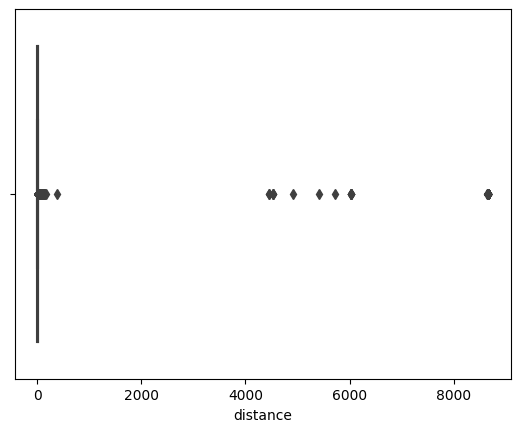

In [104]:
sns.boxplot(x='distance',data=df)

In [105]:
# we will remove the rows whose distance value is zero

df = df.drop(df[df['distance']== 0].index, axis=0)
df.shape

(48378, 14)

In [106]:
#we will remove the rows whose distance values is very high which is more than 129kms
df = df.drop(df[df['distance'] > 130 ].index, axis=0)
df.shape

(48288, 14)

<Axes: xlabel='distance'>

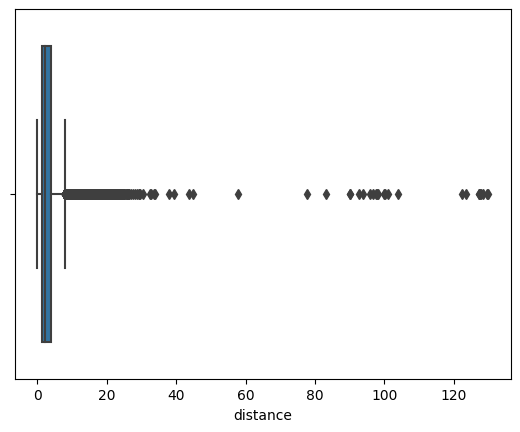

In [107]:
sns.boxplot(x='distance',data=df)

In [108]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


In [109]:
drop = ['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup','longitude_of_dropoff', 'latitude_of_dropoff', 'Minute']
df = df.drop(drop, axis = 1)

In [110]:
df.head()

,amount,no_of_passenger,year,Month,Date,Day,Hour,distance
0,4.5,1,2009,6,15,0,17,1.030764
1,16.9,1,2010,1,5,1,16,8.450134
2,5.7,2,2011,8,18,3,0,1.389525
3,7.7,1,2012,4,21,5,4,2.799270
4,5.3,1,2010,3,9,1,7,1.999157


In [111]:
df.dtypes

amount             float64
no_of_passenger      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

Text(0, 0.5, 'Count')

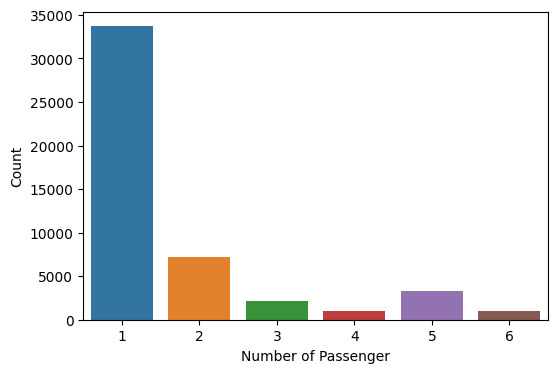

In [112]:
# Exploratory Data Analysis


# Count plot on passenger count
plt.figure(figsize=(6,4))
sns.countplot(x="no_of_passenger", data=df)
plt.xlabel("Number of Passenger")
plt.ylabel("Count")

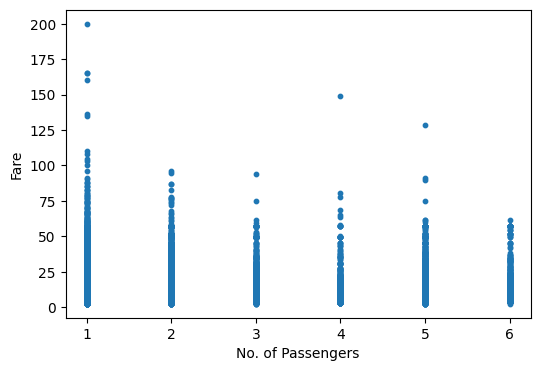

In [113]:
#Relationship beetween number of passengers and Fare
plt.figure(figsize=(6,4))
plt.scatter(x=df['no_of_passenger'], y=df['amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

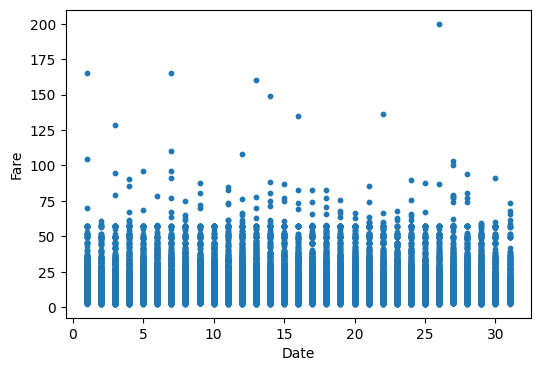

In [114]:
#Relationship between date and Fare
plt.figure(figsize=(6,4))
plt.scatter(x=df['Date'], y=df['amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

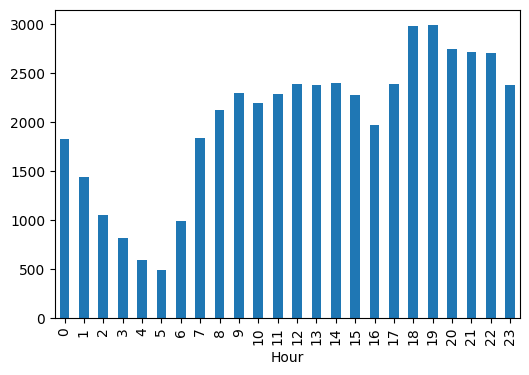

In [115]:
#Relationship between date and Fare
plt.figure(figsize=(6,4))
df.groupby(df["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

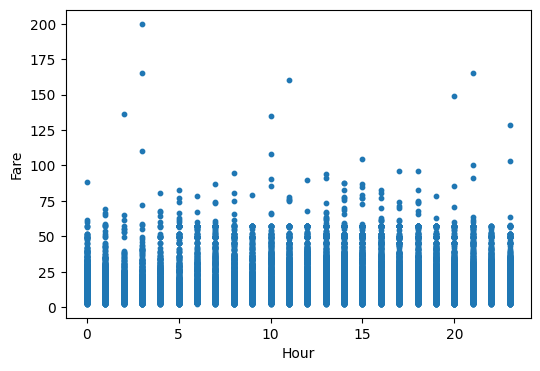

In [116]:
#Relationship between Time and Fare
plt.figure(figsize=(6,4))
plt.scatter(x=df['Hour'], y=df['amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

Text(0, 0.5, 'Count')

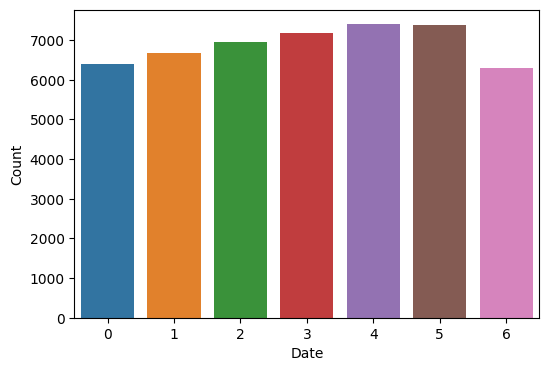

In [117]:
#impact of Day on the number of cab rides
plt.figure(figsize=(6,4))
sns.countplot(x="Day", data=df)
plt.xlabel('Date')
plt.ylabel('Count')

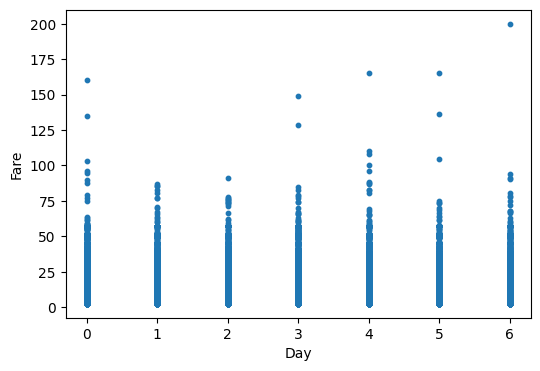

In [118]:
#Relationships between day and Fare
plt.figure(figsize=(6,4))
plt.scatter(x=df['Day'], y=df['amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

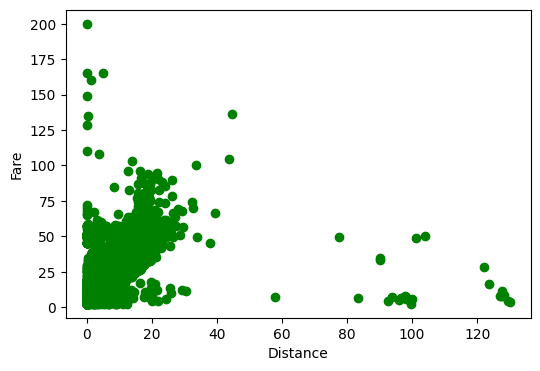

In [119]:
#Relationship between distance and fare
plt.figure(figsize=(6,4))
plt.scatter(x = df['distance'],y = df['amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

amount


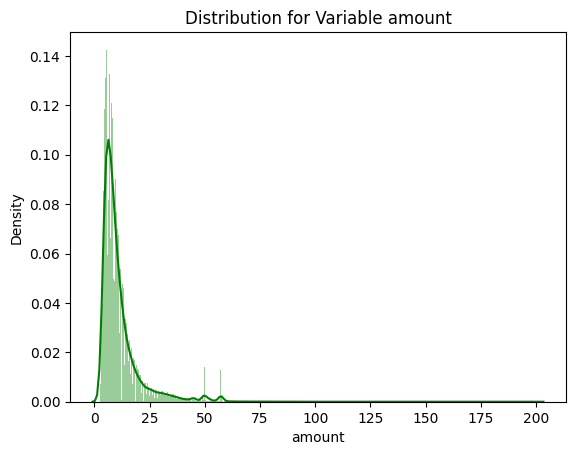

distance


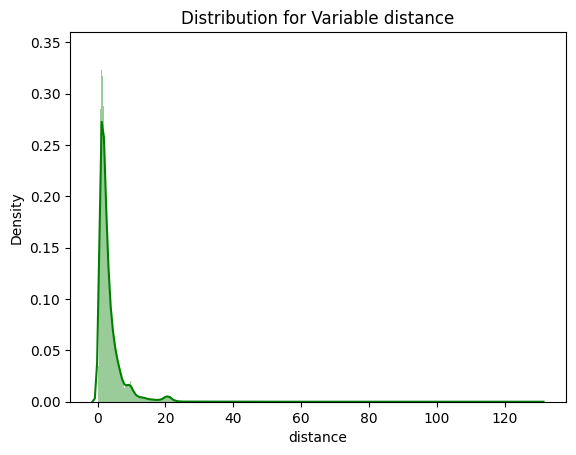

In [120]:
# Feature Scaling



#Normality check of dataing data is uniformly distributed or not-
for i in ['amount', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [121]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
df['amount'] = np.log1p(df['amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
df['distance'] = np.log1p(df['distance'])

amount


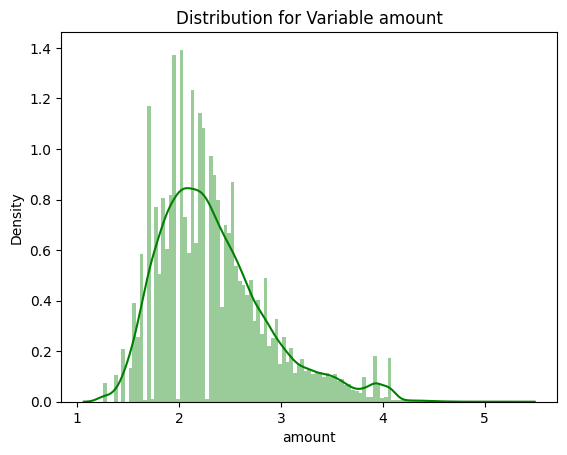

distance


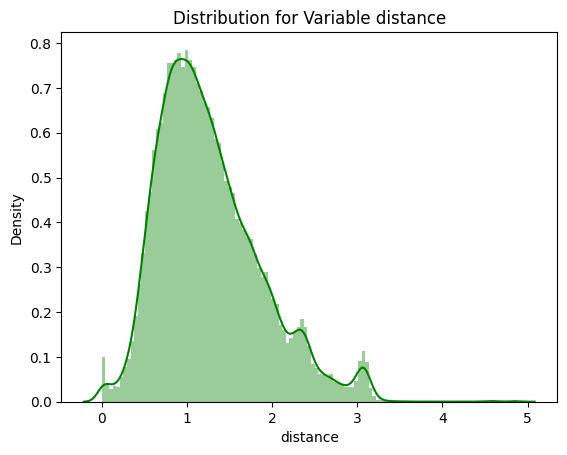

In [122]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion
for i in ['amount', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [123]:
# Model Building


x= df.drop('amount',axis=1)
y=df['amount']

In [124]:
#Data test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( x,y, test_size = 0.20, random_state = 1)

In [125]:
print(X_train.shape)
print(X_test.shape)

(38630, 7)
(9658, 7)


In [126]:
# Linear Regression


# Building model on top of training dataset

fit_LR = LinearRegression().fit(X_train , y_train)

#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [127]:
print("Root Mean Squared Error For trainaing data = "+ str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For trainaing data = 0.26531008011326374
Root Mean Squared Error For Test data = 0.2635088894727669


In [128]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.7624281883075769

In [129]:
r2_score(y_test, pred_test_LR)

0.7659349212514757

In [130]:
# Decision Tree



fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

#prediction on data data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [131]:
print("Root Mean Squared Error For trainaing data = "+ str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For trainaing data = 0.26531008011326374
Root Mean Squared Error For Test data = 0.2635088894727669


In [132]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.7052326259415419

In [133]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7107983389263755

In [134]:
# Random Forest Model



fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [135]:
print("Root Mean Squared Error For training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For training data = 0.09034169897324143
Root Mean Squared Error For Test data = 0.23895795138398396


In [136]:
## calculate R^2 for train data
r2_score(y_train, pred_train_RF)

0.9724536592505465

In [137]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.8075184729898253

In [138]:
# Gradient Boosting


fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [139]:
print("Root Mean Squared Error For training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For training data = 0.22721239333540277
Root Mean Squared Error For Test data = 0.22695240907290642


In [140]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.8257585643531753

In [141]:
print("Root Mean Squared Error For Test data for Linerar Regression = " +str(RMSE_test_LR))

print("Root Mean Squared Error For Test data for Decision Tree = "+str(RMSE_test_DT))

print("Root Mean Squared Error For Test data for Random Forest = "+str(RMSE_test_RF))

print("Root Mean Squared Error For Test data Gradient Boosting = "+str(RMSE_test_GB))

Root Mean Squared Error For Test data for Linerar Regression = 0.2635088894727669
Root Mean Squared Error For Test data for Decision Tree = 0.29290538097218666
Root Mean Squared Error For Test data for Random Forest = 0.23895795138398396
Root Mean Squared Error For Test data Gradient Boosting = 0.22695240907290642


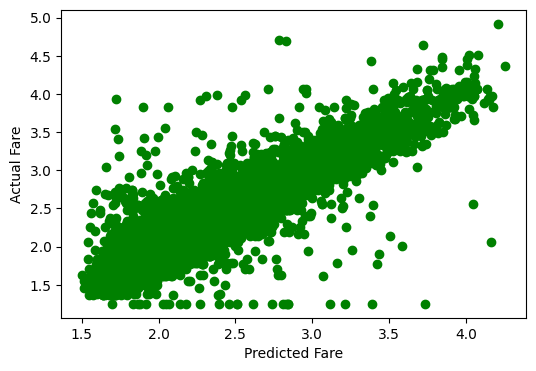

In [142]:
plt.figure(figsize=(6,4))
plt.scatter(x = pred_test_RF,y = y_test,c = "g")
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.show()

In [143]:
# for best parameters GradientBoostingRegressor
fit_GB = GradientBoostingRegressor(max_depth=7,n_estimators=19).fit(X_train, y_train)

#prediction on data data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

print("Root Mean Squared Error For training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

## calculate R^2 for train data
print(r2_score(y_train, pred_train_GB),'r2 score train data')
#calculate R^2 for test data
print(r2_score(y_test, pred_test_GB),'r2 score for test data')

Root Mean Squared Error For training data = 0.23280452744583324
Root Mean Squared Error For Test data = 0.24233020492460022
0.8170761842896043 r2 score train data
0.8020474130032385 r2 score for test data


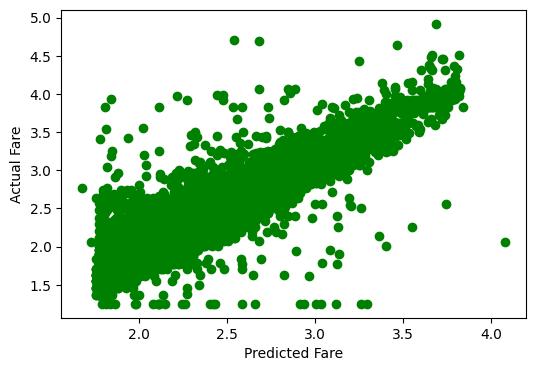

In [144]:
plt.figure(figsize=(6,4))
plt.scatter(x = pred_test_GB,y = y_test,c = "g")
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.show()